<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/pothole_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
from tensorflow import keras
import zipfile
from google.colab import files

In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
local_zip= '/content/drive/My Drive/datasets/data.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
local_zip= '/content/drive/My Drive/datasets/Test_data.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
train_cats_dir= os.path.join('/content/data/Train data/Positive data')
train_dogs_dir= os.path.join('/content/data/Train data/Negative data')
test_cats_dir= os.path.join('/content/Test data/Positive data')
test_dogs_dir= os.path.join('/content/Test data/Negative data')

In [0]:
print('Total train cats images: ',len(os.listdir(train_cats_dir)))
print('Total train dogs images: ',len(os.listdir(train_dogs_dir)))
print('Total test cats images: ',len(os.listdir(test_cats_dir)))
print('Total test dogs images: ',len(os.listdir(test_dogs_dir)))

Total train cats images:  1339
Total train dogs images:  1401
Total test cats images:  57
Total test dogs images:  14


In [0]:
model= keras.Sequential([
    keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

#compiling the model
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_gen= train_datagen.flow_from_directory( '/content/data/Train data',
                                            target_size=(300,300),
                                            batch_size=161,
                                            class_mode='binary')

test_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_gen= test_datagen.flow_from_directory( '/content/Test data',
                                            target_size=(300,300),
                                            batch_size=3,
                                            class_mode='binary')

Found 2737 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [0]:
history= model.fit_generator( train_gen,
                   steps_per_epoch=50,
                   epochs=15,
                   validation_data= test_gen,
                   validation_steps= 50,
                   verbose=2 )

Epoch 1/15
50/50 - 1597s - loss: 0.6570 - acc: 0.6266 - val_loss: 0.5902 - val_acc: 0.7905
Epoch 2/15
50/50 - 1359s - loss: 0.6030 - acc: 0.7055 - val_loss: 0.5700 - val_acc: 0.7027
Epoch 3/15
50/50 - 1356s - loss: 0.5338 - acc: 0.7460 - val_loss: 0.6108 - val_acc: 0.7027
Epoch 4/15
50/50 - 1363s - loss: 0.4673 - acc: 0.7851 - val_loss: 0.7819 - val_acc: 0.5946
Epoch 5/15
50/50 - 1366s - loss: 0.4251 - acc: 0.8108 - val_loss: 0.7236 - val_acc: 0.7635
Epoch 6/15
50/50 - 1361s - loss: 0.4121 - acc: 0.8211 - val_loss: 0.5727 - val_acc: 0.7703
Epoch 7/15
50/50 - 1354s - loss: 0.3764 - acc: 0.8352 - val_loss: 0.6246 - val_acc: 0.7568
Epoch 8/15
50/50 - 1356s - loss: 0.3685 - acc: 0.8436 - val_loss: 0.6562 - val_acc: 0.7905
Epoch 9/15
50/50 - 1356s - loss: 0.3516 - acc: 0.8516 - val_loss: 0.7832 - val_acc: 0.7635
Epoch 10/15
50/50 - 1352s - loss: 0.3518 - acc: 0.8475 - val_loss: 0.7867 - val_acc: 0.7905
Epoch 11/15
50/50 - 1351s - loss: 0.3343 - acc: 0.8585 - val_loss: 0.8717 - val_acc: 0.77

In [0]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [0]:
uploaded= files.upload()

for fn in uploaded.keys():
  # predict image
  path='/content/' + fn
  img= image.load_img(path, target_size=(300,300))
  plt.axis('off')
  plt.imshow(img)
  plt.show()
  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  
  images= np.vstack([x])
  classes= model.predict(images, batch_size=10)
  print(classes[0])
  if(classes[0]>0.5):
    print('The image is of a cat')
    
  else:
    print('The image is of a dog')
  

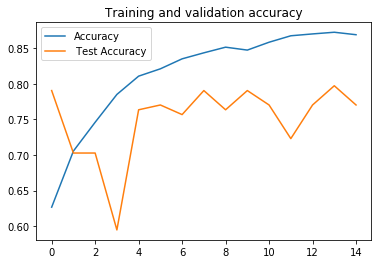

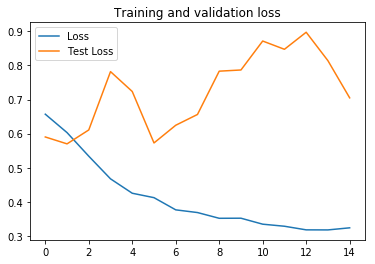

In [0]:
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(acc))
plt.plot(epochs, acc, label='Accuracy')
plt.plot(epochs, val_acc, label=' Test Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, label='Loss')
plt.plot(epochs, val_loss, label='Test Loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.show()

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth= GoogleAuth()
gauth.credentials= GoogleCredentials.get_application_default()
drive= GoogleDrive(gauth)

In [0]:
model.save('model.pt')
model_file= drive.CreateFile({'title':'model.pt'})
model_file.SetContentFile('model.pt')
model_file.Upload()
drive.CreateFile({'id':model_file.get('id')})

GoogleDriveFile({'id': '1eQIoCfSAevNbJPXPZmCO4JbaATEE6mm4'})

In [0]:
print(model)